Questo codice parte da Pattern_mining_prova_durata_titletype e tenta di dividere i generi quando ne è presente più di uno per uno stesso elemento

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

C:\Users\tomma\AppData\Local\Temp\ipykernel_23168\2786719680.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [368]:
df = pd.read_csv("train_log.csv")

In [369]:
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683


In [370]:
# Raggruppa i dati per 'titleType' e calcola la durata media
durata_media_per_titletype = df.groupby('titleType')['runtimeMinutes'].mean()

# Mostra il risultato
print(durata_media_per_titletype)


titleType
movie            92.740797
short            13.493827
tvEpisode        40.220651
tvMiniSeries    124.090909
tvMovie          81.049822
tvSeries         50.222818
tvShort           9.375000
tvSpecial        82.533784
video            71.577778
videoGame        28.000000
Name: runtimeMinutes, dtype: float64


In [371]:
count = df['numRegions'].value_counts()
pd.set_option('display.max_rows', None)  # None per mostrare tutte le righe
print(count)
pd.reset_option('display.max_rows')  # Resetta il numero di righe mostrate

numRegions
1     9247
2     1805
3      850
7      747
4      707
5      490
6      367
8      201
9      166
10     143
12     132
11     120
13      92
14      86
15      70
16      64
19      56
17      50
20      47
21      40
18      38
23      35
22      33
25      32
27      27
24      27
26      26
31      21
29      19
32      18
28      15
30      14
36      13
33      12
34      12
35      10
45       8
41       7
46       7
43       7
40       7
37       7
44       6
39       5
54       4
47       4
52       4
42       4
49       4
48       4
51       3
56       3
38       3
57       2
69       1
53       1
58       1
62       1
Name: count, dtype: int64


In [372]:
# Seleziona le colonne numeriche del DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Calcola la percentuale di valori 0 per ogni colonna numerica
percent_zero = (df[numeric_columns] == 0).mean() * 100

# Stampa il risultato
print(percent_zero)


startYear          0.000000
runtimeMinutes     0.006279
awardWins         88.596546
numVotes           0.000000
totalImages       19.529042
totalVideos       89.996860
totalCredits       0.000000
AwNmExWins        87.566719
numRegions         0.000000
ratingMean         0.000000
ReviewsTotal      47.968603
dtype: float64


In [373]:
df['rating'].unique()

array(['(7, 8]', '(5, 6]', '(8, 9]', '(6, 7]', '(2, 3]', '(4, 5]',
       '(9, 10]', '(3, 4]', '(0, 1]', '(1, 2]'], dtype=object)

In [374]:
# Mappatura degli intervalli in categorie
rating_mapping = {
    '(0, 1]': 'very_low_rated',
    '(1, 2]': 'very_low_rated',
    '(2, 3]': 'very_low_rated',
    '(3, 4]': 'very_low_rated',
    '(4, 5]': 'low_rated',
    '(5, 6]': 'low_rated',
    '(6, 7]': 'good_rated',
    '(7, 8]': 'good_rated',
    '(8, 9]': 'high_rated',
    '(9, 10]': 'high_rated'
}

# Applicare la mappatura
df['rating_group'] = df['rating'].map(rating_mapping)

In [375]:
# Calcolo del numero di virgole per ogni riga nella colonna 'countryOfOrigin'
df['number_of_countries'] = df['countryOfOrigin'].apply(lambda x: x.count(',')+1)
df['more_than_one_country'] = df['number_of_countries'].apply(lambda x: 1 if x > 1 else 0)

del df['number_of_countries']

surv_dict = {0: "1_country", 1: "more_than_1_country"}
df["more_than_one_country"] = df["more_than_one_country"].map(surv_dict)

df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ratingMean,ReviewsTotal,rating_group,more_than_one_country
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,40,0.000000,6.659294,0.693147,0.000000,21,tvEpisode,0.000000,False,False,1,['US'],"Action,Adventure,Animation",7.5,0.693147,good_rated,1_country
1,Looping,"(5, 6]",1982,28,0.000000,2.484907,0.693147,0.000000,1,videoGame,0.000000,False,False,1,['XWG'],Action,5.5,0.000000,low_rated,1_country
2,Idealnaya para,"(5, 6]",1992,92,0.000000,3.663562,0.693147,0.000000,24,movie,0.000000,False,False,1,['RU'],Comedy,5.5,0.693147,low_rated,1_country
3,MasterChef Celebrity México,"(5, 6]",2021,53,0.000000,2.772589,3.135494,0.000000,56,tvSeries,0.000000,True,False,1,['MX'],Reality-TV,5.5,0.000000,low_rated,1_country
4,Seutateueob,"(7, 8]",2020,80,0.693147,9.662625,5.852202,1.098612,47,tvSeries,0.693147,True,False,32,['KR'],"Comedy,Drama,Romance",7.5,6.124683,good_rated,1_country


In [376]:
# remove useless variables
column2drop = ["originalTitle", "AwNmExWins", "ratingMean", "totalVideos","rating"]
df.drop(column2drop, axis=1, inplace=True)
df.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,titleType,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,genres,ReviewsTotal,rating_group,more_than_one_country
0,1995,40,0.000000,6.659294,0.693147,21,tvEpisode,False,False,1,['US'],"Action,Adventure,Animation",0.693147,good_rated,1_country
1,1982,28,0.000000,2.484907,0.693147,1,videoGame,False,False,1,['XWG'],Action,0.000000,low_rated,1_country
2,1992,92,0.000000,3.663562,0.693147,24,movie,False,False,1,['RU'],Comedy,0.693147,low_rated,1_country
3,2021,53,0.000000,2.772589,3.135494,56,tvSeries,True,False,1,['MX'],Reality-TV,0.000000,low_rated,1_country
4,2020,80,0.693147,9.662625,5.852202,47,tvSeries,True,False,32,['KR'],"Comedy,Drama,Romance",6.124683,good_rated,1_country


In [377]:
# mapping = {
#     'short': 'short',
#     'tvShort': 'short',
#     'movie': 'movie',
#     'tvMovie': 'movie',
#     'tvSpecial': 'special',
#     'videogame': 'videogame',
#     'video': 'video',
#     'tvMiniSeries': 'tvseries_related',
#     'tvSeries': 'tvseries_related',
#     'tvEpisode': 'tvseries_related'
# }

# df['grouped_titleType'] = df['titleType'].replace(mapping)
# del df['titleType']

mapping = {
    'short': 'short',
    'tvShort': 'short',
    'movie': 'movie',
    'tvMovie': 'movie',
    'tvSpecial': 'other',
    'videoGame': 'other',
    'video': 'other',
    'tvMiniSeries': 'tvseries_related',
    'tvSeries': 'tvseries_related',
    'tvEpisode': 'tvseries_related'
}

df['grouped_titleType'] = df['titleType'].replace(mapping)
del df['titleType']

In [378]:
# Raggruppa i dati per 'titleType' e calcola la durata media
durata_media_per_titletype = df.groupby('grouped_titleType')['runtimeMinutes'].mean()

# Mostra il risultato
print(durata_media_per_titletype)


grouped_titleType
movie               91.135668
other               64.579505
short               13.427126
tvseries_related    45.168365
Name: runtimeMinutes, dtype: float64


In [379]:
# Mappare i generi in 4 categorie equilibrate
genre_mapping = {
    'Action': 'Action/Adventure',
    'Adventure': 'Action/Adventure',
    'Thriller': 'Action/Adventure',
    'Sci-Fi': 'Action/Adventure',
    'Horror': 'Action/Adventure',
    'Fantasy': 'Action/Adventure',
    
    'Drama': 'Drama/Crime',
    'Crime': 'Drama/Crime',
    'Mystery': 'Drama/Crime',
    'War': 'Drama/Crime',
    'Film-Noir': 'Drama/Crime',
    
    'Comedy': 'Comedy/Family',
    'Family': 'Comedy/Family',
    'Romance': 'Comedy/Family',
    'Animation': 'Comedy/Family',
    'Musical': 'Comedy/Family',
    'Short': 'Comedy/Family',
    
    'Documentary': 'Doc/Others',
    'Biography': 'Doc/Others',
    'Reality-TV': 'Doc/Others',
    'History': 'Doc/Others',
    'News': 'Doc/Others',
    'Talk-Show': 'Doc/Others',
    'Music': 'Doc/Others',
    'Sport': 'Doc/Others',
    'Game-Show': 'Doc/Others',
    'Western': 'Doc/Others',
    'Adult': 'Doc/Others'
}

# Funzione per mappare i generi in categorie
def map_genres(genres_str, genre_mapping):
    # Split dei generi in una lista (separati da virgola)
    genres = genres_str.split(',')
    
    # Mappiamo ogni genere alla sua categoria (usando la mappatura)
    mapped_genres = set([genre_mapping.get(genre, 'Altro') for genre in genres])
    
    # Uniamo le categorie mappate in una stringa separata da virgola
    return ', '.join(sorted(mapped_genres))

# Applicare la funzione alla colonna 'genres'
df['mapped_genres'] = df['genres'].apply(lambda x: map_genres(x, genre_mapping))

del df['genres']

# Visualizzare il risultato
df.head()


,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,mapped_genres
0,1995,40,0.000000,6.659294,0.693147,21,False,False,1,['US'],0.693147,good_rated,1_country,tvseries_related,"Action/Adventure, Comedy/Family"
1,1982,28,0.000000,2.484907,0.693147,1,False,False,1,['XWG'],0.000000,low_rated,1_country,other,Action/Adventure
2,1992,92,0.000000,3.663562,0.693147,24,False,False,1,['RU'],0.693147,low_rated,1_country,movie,Comedy/Family
3,2021,53,0.000000,2.772589,3.135494,56,True,False,1,['MX'],0.000000,low_rated,1_country,tvseries_related,Doc/Others
4,2020,80,0.693147,9.662625,5.852202,47,True,False,32,['KR'],6.124683,good_rated,1_country,tvseries_related,"Comedy/Family, Drama/Crime"


In [380]:
# Separare i generi e ottenere i generi unici
generi_singoli = df['mapped_genres'].dropna().apply(lambda x: x.split(','))

# Espandere la lista di generi in un'unica lista
tutti_i_generi = [genere.strip() for sublist in generi_singoli for genere in sublist]

# Determinare i generi distinti
generi_distinti = set(tutti_i_generi)

# Contare i generi distinti
numero_generi_distinti = len(generi_distinti)

print(f"I generi distinti sono: {generi_distinti}")
print(f"Il numero di generi distinti è: {numero_generi_distinti}")

I generi distinti sono: {'Doc/Others', 'Drama/Crime', 'Action/Adventure', 'Comedy/Family'}
Il numero di generi distinti è: 4


In [381]:

# Contare le occorrenze di ogni genere
conteggio_generi = {genere: tutti_i_generi.count(genere) for genere in generi_distinti}

print("Occorrenze di ogni genere:")
for genere, conteggio in conteggio_generi.items():
    print(f"{genere}: {conteggio}")

Occorrenze di ogni genere:
Doc/Others: 4147
Drama/Crime: 6699
Action/Adventure: 4440
Comedy/Family: 8645


In [382]:
# Creare colonne binarie per ogni genere distinto
# for genere in generi_distinti:
#     df[genere] = df['mapped_genres'].apply(lambda x: int(genere in x.split(', ')) if pd.notna(x) else 0)


from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_dummies = pd.DataFrame(
    mlb.fit_transform(df['mapped_genres'].apply(lambda x: x.split(', '))),
    columns=mlb.classes_,
    index=df.index
)

del df['mapped_genres']

# Concatenare tutto in un unico DataFrame binarizzato
df = pd.concat([df, genres_dummies], axis=1)



# del df['mapped_genres']

pd.set_option('display.max_columns', None)

# Mostra le prime righe del DataFrame aggiornato
df.head()

# Se vuoi ripristinare le impostazioni originali dopo
# pd.reset_option('display.max_columns')

# Visualizzare il DataFrame aggiornato
#df_train.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,canHaveEpisodes,isAdult,numRegions,countryOfOrigin,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,Action/Adventure,Comedy/Family,Doc/Others,Drama/Crime
0,1995,40,0.000000,6.659294,0.693147,21,False,False,1,['US'],0.693147,good_rated,1_country,tvseries_related,1,1,0,0
1,1982,28,0.000000,2.484907,0.693147,1,False,False,1,['XWG'],0.000000,low_rated,1_country,other,1,0,0,0
2,1992,92,0.000000,3.663562,0.693147,24,False,False,1,['RU'],0.693147,low_rated,1_country,movie,0,1,0,0
3,2021,53,0.000000,2.772589,3.135494,56,True,False,1,['MX'],0.000000,low_rated,1_country,tvseries_related,0,0,1,0
4,2020,80,0.693147,9.662625,5.852202,47,True,False,32,['KR'],6.124683,good_rated,1_country,tvseries_related,0,1,0,1


In [383]:
df['number_of_us'] = df['countryOfOrigin'].apply(lambda x: x.count('US'))
df['produced_in_USA'] = df['number_of_us'].apply(lambda x: 1 if x > 0 else 0)
del df['number_of_us']

surv_dict = {0: "Not US", 1: "US"}
df["produced"] = df["produced_in_USA"].map(surv_dict)
del df['countryOfOrigin']
del df["produced_in_USA"]

df.head()


,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalCredits,canHaveEpisodes,isAdult,numRegions,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,Action/Adventure,Comedy/Family,Doc/Others,Drama/Crime,produced
0,1995,40,0.000000,6.659294,0.693147,21,False,False,1,0.693147,good_rated,1_country,tvseries_related,1,1,0,0,US
1,1982,28,0.000000,2.484907,0.693147,1,False,False,1,0.000000,low_rated,1_country,other,1,0,0,0,Not US
2,1992,92,0.000000,3.663562,0.693147,24,False,False,1,0.693147,low_rated,1_country,movie,0,1,0,0,Not US
3,2021,53,0.000000,2.772589,3.135494,56,True,False,1,0.000000,low_rated,1_country,tvseries_related,0,0,1,0,Not US
4,2020,80,0.693147,9.662625,5.852202,47,True,False,32,6.124683,good_rated,1_country,tvseries_related,0,1,0,1,Not US


In [384]:
df["Year_bin"] = pd.cut(df["startYear"], 5)
df["runtime_bin"] = pd.qcut(df["runtimeMinutes"], 4)
df["Votes_bin"] = pd.qcut(df["numVotes"], 4)
#df["Images_bin"] = pd.cut(df["totalImages"], 4)
df["Credits_bin"] = pd.qcut(df["totalCredits"], 4)
#df["regions_bin"] = pd.cut(df["numRegions"], 4)

# df["Videos_bin"] = pd.cut(df["totalVideos"], 4)
# df["Reviews_bin"] = pd.cut(df["ReviewsTotal"], 4)


#IN CASO DI DIVISIONE CON CUT

# # Step 1: Filtrare i valori diversi da 0 per creare intervalli equispaziati
# non_zero_values = df[df["totalImages"] != 0]["totalImages"]

# # Step 2: Creare 3 intervalli equispaziati per i valori non uguali a 0, ottenendo anche i bordi
# intervals, bins = pd.cut(non_zero_values, bins=3, include_lowest=True, retbins=True)

# # Step 3: Creare i bordi finali degli intervalli, includendo 0 nel primo intervallo
# final_bins = [-float('inf'), 0] + list(bins[1:])

# # Step 4: Creare una nuova colonna "totalImages_bin" con i nuovi intervalli
# df["Images_bin"] = pd.cut(df["totalImages"], bins=final_bins)

#IN CASO DI DIVISIONE CON CUT

# Step 1: Separare gli elementi uguali a 1
df["is_one"] = df["numRegions"] == 1

# Step 2: Creare i bin automaticamente con pd.cut per valori > 1
num_bins = 3  # Numero di intervalli da creare
cut_bins = pd.cut(df.loc[~df["is_one"], "numRegions"], bins=num_bins)

# Step 3: Etichettare manualmente la categoria "1"
df["regions_bin"] = pd.cut(
    df["numRegions"],  # Applichiamo pd.cut su tutta la colonna
    bins=[-np.inf, 1] + list(cut_bins.cat.categories.right),  # Aggiungiamo manualmente il primo bin
    labels=["1"] + list(cut_bins.cat.categories),  # Etichetta manuale per la categoria "1"
    include_lowest=True,
)

# Step 4: Rimuovere la colonna temporanea "is_one"
df.drop(columns=["is_one"], inplace=True)

#IN CASO DI DIVISIONE CON QCUT

# Step 1: Filtrare i valori diversi da 0 per creare intervalli basati su quantili
non_zero_values = df[df["totalImages"] != 0]["totalImages"]

# Step 2: Creare 3 intervalli equispaziati per i valori non uguali a 0 usando qcut, ottenendo anche i bordi
intervals, bins = pd.qcut(non_zero_values, q=4, retbins=True, labels=False, duplicates='drop')

# Step 3: Creare i bordi finali degli intervalli, includendo 0 nel primo intervallo
final_bins = [-float('inf'), 0] + list(bins[1:])

# Step 4: Creare una nuova colonna "totalImages_bin" con i nuovi intervalli
df["Images_bin"] = pd.cut(df["totalImages"], bins=final_bins)

df.drop(["startYear", "runtimeMinutes", "awardWins", "numVotes", "totalImages", "totalCredits", "numRegions"], axis=1, inplace=True)
df.head()

,canHaveEpisodes,isAdult,ReviewsTotal,rating_group,more_than_one_country,grouped_titleType,Action/Adventure,Comedy/Family,Doc/Others,Drama/Crime,produced,Year_bin,runtime_bin,Votes_bin,Credits_bin,regions_bin,Images_bin
0,False,False,0.693147,good_rated,1_country,tvseries_related,1,1,0,0,US,"(1994.8, 2024.0]","(29.0, 53.0]","(5.056, 13.624]","(17.0, 35.0]",1,"(0.0, 1.099]"
1,False,False,0.000000,low_rated,1_country,other,1,0,0,0,Not US,"(1965.6, 1994.8]","(-0.001, 29.0]","(1.7910000000000001, 2.773]","(0.999, 17.0]",1,"(0.0, 1.099]"
2,False,False,0.693147,low_rated,1_country,movie,0,1,0,0,Not US,"(1965.6, 1994.8]","(90.0, 570.0]","(2.773, 3.664]","(17.0, 35.0]",1,"(0.0, 1.099]"
3,True,False,0.000000,low_rated,1_country,tvseries_related,0,0,1,0,Not US,"(1994.8, 2024.0]","(29.0, 53.0]","(1.7910000000000001, 2.773]","(35.0, 66.0]",1,"(2.197, 8.162]"
4,True,False,6.124683,good_rated,1_country,tvseries_related,0,1,0,1,Not US,"(1994.8, 2024.0]","(53.0, 90.0]","(5.056, 13.624]","(35.0, 66.0]","(24.333, 46.667]","(2.197, 8.162]"


In [385]:
# df["Year_bin"] = pd.cut(df["startYear"], 5)
# df["runtime_bin"] = pd.qcut(df["runtimeMinutes"], 4)
# df["Votes_bin"] = pd.cut(df["numVotes"], 4)
# df["Images_bin"] = pd.cut(df["totalImages"], 4)
# df["Credits_bin"] = pd.qcut(df["totalCredits"], 4)

# # df["awardWins_bin"] = pd.cut(df["awardWins"], 4)
# # df["Videos_bin"] = pd.cut(df["totalVideos"], 4)
# # df["Reviews_bin"] = pd.cut(df["ReviewsTotal"], 4)

# df.drop(["startYear", "runtimeMinutes", "numVotes", "totalImages", "totalCredits"], axis=1, inplace=True)
# df.head()

In [386]:

# Per qcut (per le variabili divise con qcut)
print("Intervalli per 'startYear':")
print(df["Year_bin"].unique())  # Mostra gli intervalli
print(df["Year_bin"].value_counts())  # Conta gli elementi per ciascun intervallo

print("\nIntervalli per 'runtimeMinutes':")
print(df["runtime_bin"].unique()) 
print(df["runtime_bin"].value_counts()) 

print("\nIntervalli per 'numVotes':")
print(df["Votes_bin"].unique())
print(df["Votes_bin"].value_counts()) 

print("\nIntervalli per 'totalImages':")
print(df["Images_bin"].unique())
print(df["Images_bin"].value_counts()) 

print("\nIntervalli per 'totalCredits':")
print(df["Credits_bin"].unique())
print(df["Credits_bin"].value_counts()) 

print("\nIntervalli per 'numRegions':")
print(df["regions_bin"].unique())
print(df["regions_bin"].value_counts()) 

# # Per cut (per le variabili divise con cut)
# print("\nIntervalli per 'awardWins':")
# print(df["awardWins_bin"].unique())  # Mostra gli intervalli
# print(df["awardWins_bin"].value_counts())  # Conta gli elementi per ciascun intervallo

# print("\nIntervalli per 'totalVideos':")
# print(df["Videos_bin"].unique())
# print(df["Videos_bin"].value_counts()) 

# print("\nIntervalli per 'ReviewsTotal':")
# print(df["Reviews_bin"].unique())
# print(df["Reviews_bin"].value_counts())


Intervalli per 'startYear':
[(1994.8, 2024.0], (1965.6, 1994.8], (1936.4, 1965.6], (1877.854, 1907.2], (1907.2, 1936.4]]
Categories (5, interval[float64, right]): [(1877.854, 1907.2] < (1907.2, 1936.4] < (1936.4, 1965.6] < (1965.6, 1994.8] < (1994.8, 2024.0]]
Year_bin
(1994.8, 2024.0]      8791
(1965.6, 1994.8]      4765
(1936.4, 1965.6]      1672
(1907.2, 1936.4]       570
(1877.854, 1907.2]     127
Name: count, dtype: int64

Intervalli per 'runtimeMinutes':
[(29.0, 53.0], (-0.001, 29.0], (90.0, 570.0], (53.0, 90.0]]
Categories (4, interval[float64, right]): [(-0.001, 29.0] < (29.0, 53.0] < (53.0, 90.0] < (90.0, 570.0]]
runtime_bin
(29.0, 53.0]      4242
(-0.001, 29.0]    4063
(53.0, 90.0]      3833
(90.0, 570.0]     3787
Name: count, dtype: int64

Intervalli per 'numVotes':
[(5.056, 13.624], (1.7910000000000001, 2.773], (2.773, 3.664], (3.664, 5.056]]
Categories (4, interval[float64, right]): [(1.7910000000000001, 2.773] < (2.773, 3.664] < (3.664, 5.056] < (5.056, 13.624]]
Votes_bin


In [387]:
# Recuperiamo gli ultimi due intervalli
intervals = df["regions_bin"].cat.categories
last_two_intervals = intervals[-2:]  # Ultimi due intervalli

# Creiamo un nuovo intervallo unito
new_interval = f"({last_two_intervals[0].left}, {last_two_intervals[1].right}]"

# Sostituire i vecchi intervalli con il nuovo intervallo
df["regions_bin"] = df["regions_bin"].replace(
    {last_two_intervals[0]: new_interval, last_two_intervals[1]: new_interval}
)

# Aggiornare le categorie della colonna
new_categories = list(intervals[:-2]) + [new_interval]
df["regions_bin"] = df["regions_bin"].astype("category").cat.set_categories(new_categories)




# 1. Ottenere i primi due intervalli
first_two_intervals = df["Year_bin"].cat.categories[:2]

# 2. Creare il nuovo intervallo unito come oggetto Interval
new_interval = pd.Interval(left=first_two_intervals[0].left, right=first_two_intervals[1].right, closed='right')

# 3. Sostituire i vecchi intervalli con il nuovo intervallo
df["Year_bin"] = df["Year_bin"].replace({
    first_two_intervals[0]: new_interval,
    first_two_intervals[1]: new_interval
})


C:\Users\tomma\AppData\Local\Temp\ipykernel_23168\2904848591.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["regions_bin"] = df["regions_bin"].replace(
C:\Users\tomma\AppData\Local\Temp\ipykernel_23168\2904848591.py:27: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Year_bin"] = df["Year_bin"].replace({


In [388]:
# Per cut (per le variabili divise con cut)
print("\nIntervalli per 'startYear':")
print(df["Year_bin"].unique())  # Mostra gli intervalli
print(df["Year_bin"].value_counts())  # Conta gli elementi per ciascun intervallo

# Per cut (per le variabili divise con cut)
print("\nIntervalli per 'numRegions':")
print(df["regions_bin"].unique())  # Mostra gli intervalli
print(df["regions_bin"].value_counts())  # Conta gli elementi per ciascun intervallo


Intervalli per 'startYear':
[(1994.8, 2024.0], (1965.6, 1994.8], (1936.4, 1965.6], (1877.854, 1936.4]]
Categories (4, interval[float64, right]): [(1877.854, 1936.4] < (1936.4, 1965.6] < (1965.6, 1994.8] < (1994.8, 2024.0]]
Year_bin
(1994.8, 2024.0]      8791
(1965.6, 1994.8]      4765
(1936.4, 1965.6]      1672
(1877.854, 1936.4]     697
Name: count, dtype: int64

Intervalli per 'numRegions':
['1', '(24.333, 69.0]', (1.933, 24.333]]
Categories (3, object): ['1' < (1.933, 24.333] < '(24.333, 69.0]']
regions_bin
1                  9247
(1.933, 24.333]    6366
(24.333, 69.0]      312
Name: count, dtype: int64


In [389]:
# Trasformare le colonne
df['isAdult'] = df['isAdult'].apply(lambda x: 'is_adult' if x else 'no_adult')
df['canHaveEpisodes'] = df['canHaveEpisodes'].apply(lambda x: 'episodes' if x else 'no_episodes')
df['Reviews'] = np.where(df['ReviewsTotal'] == 0, 'Reviews', 'No_reviews')

del df['ReviewsTotal']
# Visualizzare il DataFrame modificato
df.head()

,canHaveEpisodes,isAdult,rating_group,more_than_one_country,grouped_titleType,Action/Adventure,Comedy/Family,Doc/Others,Drama/Crime,produced,Year_bin,runtime_bin,Votes_bin,Credits_bin,regions_bin,Images_bin,Reviews
0,no_episodes,no_adult,good_rated,1_country,tvseries_related,1,1,0,0,US,"(1994.8, 2024.0]","(29.0, 53.0]","(5.056, 13.624]","(17.0, 35.0]",1,"(0.0, 1.099]",No_reviews
1,no_episodes,no_adult,low_rated,1_country,other,1,0,0,0,Not US,"(1965.6, 1994.8]","(-0.001, 29.0]","(1.7910000000000001, 2.773]","(0.999, 17.0]",1,"(0.0, 1.099]",Reviews
2,no_episodes,no_adult,low_rated,1_country,movie,0,1,0,0,Not US,"(1965.6, 1994.8]","(90.0, 570.0]","(2.773, 3.664]","(17.0, 35.0]",1,"(0.0, 1.099]",No_reviews
3,episodes,no_adult,low_rated,1_country,tvseries_related,0,0,1,0,Not US,"(1994.8, 2024.0]","(29.0, 53.0]","(1.7910000000000001, 2.773]","(35.0, 66.0]",1,"(2.197, 8.162]",Reviews
4,episodes,no_adult,good_rated,1_country,tvseries_related,0,1,0,1,Not US,"(1994.8, 2024.0]","(53.0, 90.0]","(5.056, 13.624]","(35.0, 66.0]","(24.333, 69.0]","(2.197, 8.162]",No_reviews


In [390]:
# df["rating"] = df["rating"].astype(str) + "_rating"
df["regions_bin"] = df["regions_bin"].astype(str) + "_regions"
df["Year_bin"] = df["Year_bin"].astype(str) + "_year"
df["runtime_bin"] = df["runtime_bin"].astype(str) + "_minutes"
df["Votes_bin"] = df["Votes_bin"].astype(str) + "_votes"
df["Images_bin"] = df["Images_bin"].astype(str) + "_images"
df["Credits_bin"] = df["Credits_bin"].astype(str) + "_credits"
# df["awardWins_bin"] = df["awardWins_bin"].astype(str) + "awards"
#df["Videos_bin"] = df["Videos_bin"].astype(str) + "_votes"
#df["Reviews_bin"] = df["Reviews_bin"].astype(str) + "_reviews"

df.head()

,canHaveEpisodes,isAdult,rating_group,more_than_one_country,grouped_titleType,Action/Adventure,Comedy/Family,Doc/Others,Drama/Crime,produced,Year_bin,runtime_bin,Votes_bin,Credits_bin,regions_bin,Images_bin,Reviews
0,no_episodes,no_adult,good_rated,1_country,tvseries_related,1,1,0,0,US,"(1994.8, 2024.0]_year","(29.0, 53.0]_minutes","(5.056, 13.624]_votes","(17.0, 35.0]_credits",1_regions,"(0.0, 1.099]_images",No_reviews
1,no_episodes,no_adult,low_rated,1_country,other,1,0,0,0,Not US,"(1965.6, 1994.8]_year","(-0.001, 29.0]_minutes","(1.7910000000000001, 2.773]_votes","(0.999, 17.0]_credits",1_regions,"(0.0, 1.099]_images",Reviews
2,no_episodes,no_adult,low_rated,1_country,movie,0,1,0,0,Not US,"(1965.6, 1994.8]_year","(90.0, 570.0]_minutes","(2.773, 3.664]_votes","(17.0, 35.0]_credits",1_regions,"(0.0, 1.099]_images",No_reviews
3,episodes,no_adult,low_rated,1_country,tvseries_related,0,0,1,0,Not US,"(1994.8, 2024.0]_year","(29.0, 53.0]_minutes","(1.7910000000000001, 2.773]_votes","(35.0, 66.0]_credits",1_regions,"(2.197, 8.162]_images",Reviews
4,episodes,no_adult,good_rated,1_country,tvseries_related,0,1,0,1,Not US,"(1994.8, 2024.0]_year","(53.0, 90.0]_minutes","(5.056, 13.624]_votes","(35.0, 66.0]_credits","(24.333, 69.0]_regions","(2.197, 8.162]_images",No_reviews


In [391]:
# X = df.values.tolist()

# Trasforma ogni riga in una transazione
X = df.apply(
    lambda row: [
        row['canHaveEpisodes'],
        row['isAdult'],
        row['rating_group'],
        row['more_than_one_country'],
        row['grouped_titleType'],
        row['produced'],
        row['Year_bin'],
        row['runtime_bin'],
        row['Votes_bin'],
        row['Credits_bin'],
        row['regions_bin'],
        row['Images_bin'],
        row['Reviews'],
        *[col for col in genres_dummies.columns if row[col] == 1]  # Generi attivi
    ], axis=1
).tolist()

In [392]:
X[0]

['no_episodes',
 'no_adult',
 'good_rated',
 '1_country',
 'tvseries_related',
 'US',
 '(1994.8, 2024.0]_year',
 '(29.0, 53.0]_minutes',
 '(5.056, 13.624]_votes',
 '(17.0, 35.0]_credits',
 '1_regions',
 '(0.0, 1.099]_images',
 'No_reviews',
 'Action/Adventure',
 'Comedy/Family']

# Pattern Mining

In [393]:
from fim import apriori

In [394]:
# frequent itemset >= min_supp
# closed: an itemset is closed if none of its immediate supersets has the same support as the itemset
# maximal: an itemset is maximal frequent if none of its immediate supersets is frequent

### Frequent Itemsets

In [395]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
#target="s": Indica che vogliamo trovare i frequent itemsets con il supporto minimo indicato. Se fosse impostato a "r", si cercherebbero regole di associaction.
#report="S": Impostando questo parametro su "S", il risultato sarà una lista di itemsets frequenti accompagnata dal loro supporto.

pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes)",22.266876
2,"(low_rated, no_episodes, 1_country)",20.282575
3,"(low_rated, no_episodes, no_adult)",21.281005
4,"(low_rated, 1_country)",21.670330
...,...,...
562,"(1_regions, no_adult)",56.332810
563,"(no_episodes, 1_country)",84.000000
564,"(no_episodes, 1_country, no_adult)",81.594976
565,"(no_episodes, no_adult)",87.987441


### Closed Itemsets

In [396]:
# supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes)",22.266876
2,"(low_rated, no_episodes, 1_country)",20.282575
3,"(low_rated, no_episodes, no_adult)",21.281005
4,"(low_rated, 1_country)",21.670330
...,...,...
543,"(1_regions, no_adult)",56.332810
544,"(no_episodes, 1_country)",84.000000
545,"(no_episodes, 1_country, no_adult)",81.594976
546,"(no_episodes, no_adult)",87.987441


### Maximal Itemsets

In [397]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"((1.099, 2.197]_images, no_adult)",20.069074
1,"(low_rated, no_episodes, 1_country)",20.282575
2,"(low_rated, no_episodes, no_adult)",21.281005
3,"(low_rated, 1_country, no_adult)",20.665620
4,"((90.0, 570.0]_minutes, movie, no_episodes, no...",20.929356
...,...,...
87,"((1994.8, 2024.0]_year, good_rated, no_episode...",24.533752
88,"((1994.8, 2024.0]_year, 1_regions, no_episodes...",29.532182
89,"(Not US, good_rated, no_episodes, 1_country, n...",25.638932
90,"(Not US, 1_regions, no_episodes, 1_country, no...",24.414443


### Support plots

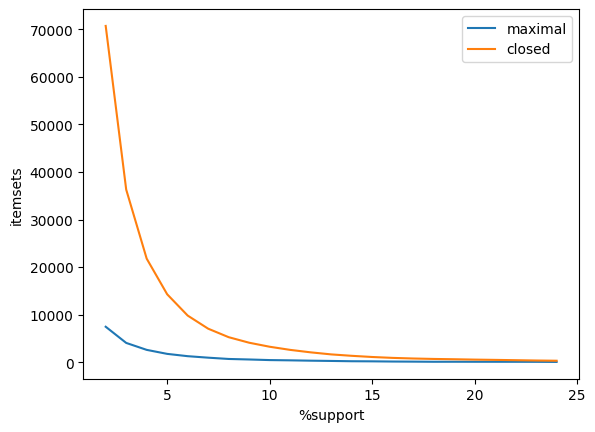

In [398]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

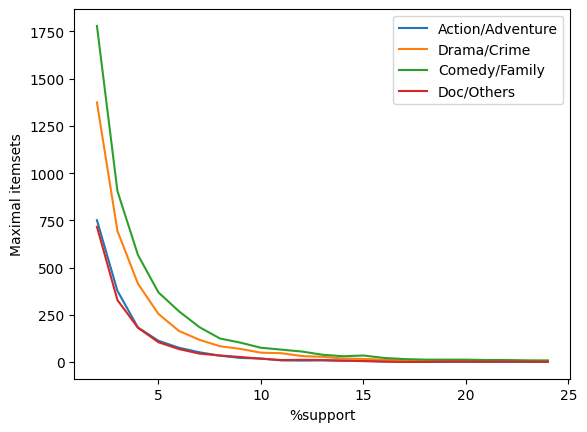

In [399]:
filter_1 = []
filter_2 = []
filter_3 = []
filter_4 = []
# filter_5 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "Action/Adventure" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "Drama/Crime" in item[0]]))
    filter_3.append(len([item for item in max_itemsets if "Comedy/Family" in item[0]]))
    filter_4.append(len([item for item in max_itemsets if "Doc/Others" in item[0]]))
    # filter_5.append(len([item for item in max_itemsets if "Sci-Fi and Fantasy" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="Action/Adventure")
plt.plot(np.arange(2, max_supp), filter_2, label="Drama/Crime")
plt.plot(np.arange(2, max_supp), filter_3, label="Comedy/Family")
plt.plot(np.arange(2, max_supp), filter_4, label="Doc/Others")
# plt.plot(np.arange(2, max_supp), filter_5, label="Sci-Fi and Fantasy")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("Maximal itemsets")

plt.show()

# 'Comedy', 'Action and Adventure', 'Other', 'Drama', 'Sci-Fi and Fantasy'

#### Support vs number of itemsets

In [400]:
len_max_it = []
len_cl_it = []

# Numero totale di transazioni
total_transactions = len(X)

# Step 1: Definizione della griglia di parametri
supp_values = np.linspace(10, 50, 5)  # Supporto minimo da 10% a 50%
zmin_values = np.arange(5, df.shape[1] + 1)  # zmin da 2 fino al numero di colonne

for supp in supp_values:
    for zmin in zmin_values:
        max_itemsets = apriori(X, target="m", supp=supp, zmin=zmin)
        cl_itemsets = apriori(X, target="c", supp=supp, zmin=zmin)
        len_max_it.append(len(max_itemsets))
        len_cl_it.append(len(cl_itemsets))

        # Stampa i pattern in ordine decrescente per supporto (massimali)
        print(f"\nMassimal itemsets (supporto={supp:.2f}, zmin={zmin}):")
        for itemset, support in sorted(
            max_itemsets,
            key=lambda x: -x[1]  # Ordina per supporto decrescente
        ):
            percent_support = (support / total_transactions) * 100
            print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")

        # Stampa i pattern in ordine decrescente per supporto (chiusi)
        print(f"\nClosed itemsets (supporto={supp:.2f}, zmin={zmin}):")
        for itemset, support in sorted(
            cl_itemsets,
            key=lambda x: -x[1]  # Ordina per supporto decrescente
        ):
            percent_support = (support / total_transactions) * 100
            print(f"Itemset: {itemset}, Supporto: {percent_support:.2f}%")






# plt.plot(np.arange(2, 50), len_max_it, label="maximal")
# plt.plot(np.arange(2, 50), len_cl_it, label="closed")
# plt.legend()
# plt.xlabel("%support")
# plt.ylabel("itemsets")

# plt.show()


Massimal itemsets (supporto=10.00, zmin=5):
Itemset: ('(0.0, 1.099]_images', 'No_reviews', 'no_episodes', '1_country', 'no_adult'), Supporto: 15.64%
Itemset: ('movie', '(1.933, 24.333]_regions', 'No_reviews', 'no_episodes', '1_country', 'no_adult'), Supporto: 15.58%
Itemset: ('movie', '(1994.8, 2024.0]_year', 'no_episodes', '1_country', 'no_adult'), Supporto: 15.03%
Itemset: ('(1.933, 24.333]_regions', 'Comedy/Family', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.97%
Itemset: ('(0.0, 1.099]_images', 'Comedy/Family', '1_regions', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.74%
Itemset: ('(1965.6, 1994.8]_year', '1_regions', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.68%
Itemset: ('(29.0, 53.0]_minutes', 'tvseries_related', '1_regions', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.66%
Itemset: ('(1965.6, 1994.8]_year', 'good_rated', 'no_episodes', '1_country', 'no_adult'), Supporto: 14.66%
Itemset: ('US', '(1994.8, 2024.0]_year', '1_regions', 'no_e

### Rules
if the target is association rules:
                a list of rules (i.e. tuples with two or more elements),
                each consisting of a head/consequent item, a tuple with
                a body/antecedent item set, and the values selected by
                the parameter 'report', which may be combined into a
                tuple or a list if report[0] is '(' or '[', respectively.

In [401]:
conf = 60
supp = 20  
zmin = 2

rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)


rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False) #stampato in questo modo l'elenco è troncato e non scrollabile

pd.set_option('display.max_colwidth', None)

# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


rules_df.shape


,consequent,antecedent,abs_support,%_support,confidence,lift
0,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, 1_country, no_adult)",2214,13.902669,0.654255,4.218225
1,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, 1_country)",2216,13.915228,0.654073,4.217051
2,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, no_adult)",2285,14.348509,0.651926,4.203206
3,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes)",2287,14.361068,0.651753,4.202089
4,short,"((-0.001, 29.0]_minutes, Comedy/Family, 1_country, no_adult)",2214,13.902669,0.635476,4.097151
5,short,"((-0.001, 29.0]_minutes, Comedy/Family, 1_country)",2216,13.915228,0.635321,4.096149
6,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_adult)",2285,14.348509,0.630519,4.065187
7,short,"((-0.001, 29.0]_minutes, Comedy/Family)",2287,14.361068,0.630375,4.064259
8,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country, no_adult)",2252,14.141287,0.601817,3.880137
9,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country)",2254,14.153846,0.601548,3.878401


(1903, 6)

PROVA CLASSIFICATION PER I TITLETYPES

In [402]:
# Estrai tutti i valori distinti dalla colonna 'titleType'
unique_title_types = df['grouped_titleType'].dropna().unique()

# Filtra le regole che hanno 'titleType' come conseguente
title_type_rules_df = rules_df[rules_df["consequent"].isin(unique_title_types)]

# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(title_type_rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


,consequent,antecedent,abs_support,%_support,confidence,lift
0,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, 1_country, no_adult)",2214,13.902669,0.654255,4.218225
1,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, 1_country)",2216,13.915228,0.654073,4.217051
2,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, no_adult)",2285,14.348509,0.651926,4.203206
3,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes)",2287,14.361068,0.651753,4.202089
4,short,"((-0.001, 29.0]_minutes, Comedy/Family, 1_country, no_adult)",2214,13.902669,0.635476,4.097151
5,short,"((-0.001, 29.0]_minutes, Comedy/Family, 1_country)",2216,13.915228,0.635321,4.096149
6,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_adult)",2285,14.348509,0.630519,4.065187
7,short,"((-0.001, 29.0]_minutes, Comedy/Family)",2287,14.361068,0.630375,4.064259
8,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country, no_adult)",2252,14.141287,0.601817,3.880137
9,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country)",2254,14.153846,0.601548,3.878401


In [403]:
# Supponiamo che 'rules' sia la lista di regole di associazione

# Itera su tutti i valori distinti
for title_type in unique_title_types:
    # Filtra le regole per il titolo corrente
    matching_rules = [r for r in rules if r[0] == title_type]
    
    # Se ci sono regole per questo titolo
    if matching_rules:
        print('\n')
        print(f"Regole per '{title_type}':")
        
        # Per ogni regola trovata
        for rule in matching_rules:
            consequent = rule[0]  # 'titleType'
            antecedent = rule[1]  # Le condizioni che portano a 'titleType'
            confidence = rule[4]
            print(f"  Conseguente: {consequent}")
            print(f"  Antecedente: {antecedent}")
            print(f"  Confidence: {confidence}")
            print("-" * 50)




Regole per 'tvseries_related':
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', 'no_episodes', 'no_adult')
  Confidence: 0.8636503539550631
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', 'no_episodes')
  Confidence: 0.8620583717357911
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', '1_country', 'no_adult')
  Confidence: 0.8973402933134477
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', '1_country')
  Confidence: 0.8963127938629052
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes', 'no_adult')
  Confidence: 0.8951231060606061
--------------------------------------------------
  Conseguente: tvseries_related
  Antecedente: ('(29.0, 53.0]_minutes',)
  Confidence: 0.894153

PROVA CLASSIFICATION PER YEAR

In [404]:
# Estrai tutti i valori distinti dalla colonna 'titleType'
unique_year = df['Year_bin'].dropna().unique()

# Filtra le regole che hanno 'titleType' come conseguente
year_rules_df = rules_df[rules_df["consequent"].isin(unique_year)]

# Visualizza la tabella con le regole filtrate
# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(year_rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


,consequent,antecedent,abs_support,%_support,confidence,lift
219,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, no_episodes, no_adult)",2306,14.480377,0.696046,1.260895
220,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, no_episodes)",2309,14.499215,0.695901,1.260633
222,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, 1_country)",2418,15.183673,0.695827,1.260499
221,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, 1_country, no_adult)",2409,15.127159,0.695640,1.260159
224,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits,)",2731,17.149137,0.687563,1.245528
223,"(1994.8, 2024.0]_year","((66.0, 1885.0]_credits, no_adult)",2722,17.092622,0.687374,1.245186
746,"(1994.8, 2024.0]_year","(tvseries_related, Reviews, 1_country)",2245,14.097331,0.680716,1.233124
744,"(1994.8, 2024.0]_year","(tvseries_related, Reviews, 1_country, no_adult)",2234,14.028257,0.679647,1.231189
750,"(1994.8, 2024.0]_year","(tvseries_related, Reviews)",2315,14.536892,0.676110,1.224781
748,"(1994.8, 2024.0]_year","(tvseries_related, Reviews, no_adult)",2304,14.467818,0.675066,1.222890


In [405]:
# Supponiamo che 'rules' sia la lista di regole di associazione

# Itera su tutti i valori distinti
for year in unique_year:
    # Filtra le regole per il titolo corrente
    matching_rules = [r for r in rules if r[0] == year]
    
    # Se ci sono regole per questo titolo
    if matching_rules:
        print('\n')
        print(f"Regole per '{year}':")
        
        # Per ogni regola trovata
        for rule in matching_rules:
            consequent = rule[0]  # 'titleType'
            antecedent = rule[1]  # Le condizioni che portano a 'titleType'
            print(f"  Conseguente: {consequent}")
            print(f"  Antecedente: {antecedent}")
            print("-" * 50)




Regole per '(1994.8, 2024.0]_year':
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(66.0, 1885.0]_credits', 'no_episodes', 'no_adult')
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(66.0, 1885.0]_credits', 'no_episodes')
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(66.0, 1885.0]_credits', '1_country', 'no_adult')
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(66.0, 1885.0]_credits', '1_country')
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(66.0, 1885.0]_credits', 'no_adult')
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(66.0, 1885.0]_credits',)
--------------------------------------------------
  Conseguente: (1994.8, 2024.0]_year
  Antecedente: ('(1.7910000000000001, 2.773]_votes',

GRAFICI RULES

In [406]:
len_r = []
min_sup = 1
max_sup = 30
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

# len_r sarà una matrice 2D in cui:
# ogni riga rappresenta un valore di supporto.
# ogni colonna rappresenta un valore di confidenza.
# ogni elemento nella matrice rappresenta il numero di regole generate per una combinazione di supporto e confidenza.

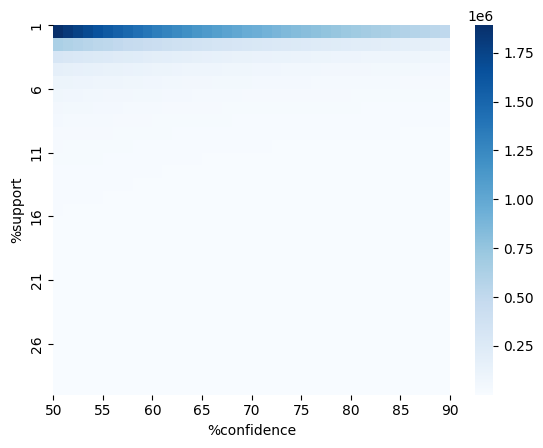

In [407]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

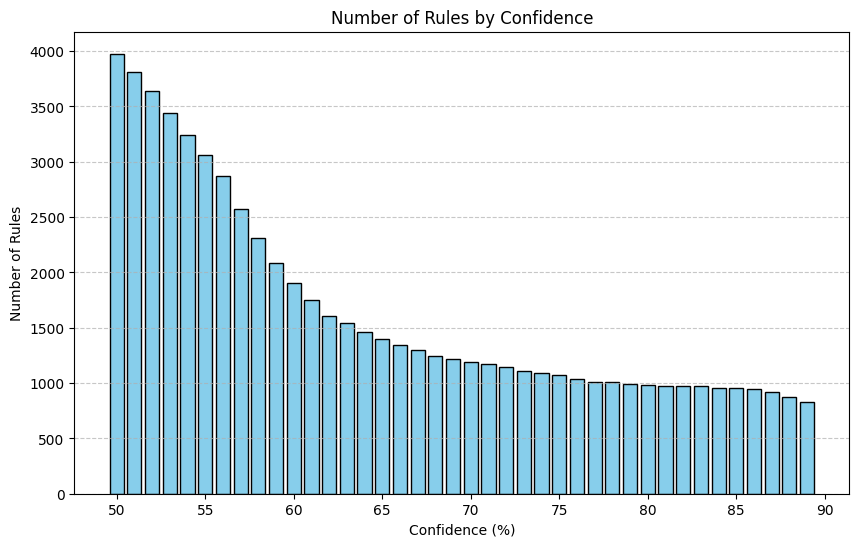

In [408]:
# Specifica il valore di supporto desiderato
specific_support = 20  # Modifica con il valore desiderato
support_index = specific_support - min_sup  # Calcola l'indice corrispondente nel range di supporto

# Prendi i dati per il supporto specificato
rules_per_conf = len_r[support_index]  # Estrae i numeri di regole per il supporto fissato


# Somma il numero di regole generate per ogni valore di confidenza
conf_values = list(range(min_conf, max_conf))

# Crea un istogramma
plt.figure(figsize=(10, 6))
plt.bar(conf_values, rules_per_conf, color='skyblue', edgecolor='black')
plt.xlabel("Confidence (%)")
plt.ylabel("Number of Rules")
plt.title("Number of Rules by Confidence")
# plt.title(f"Number of Rules by Confidence (Support = {specific_support}%)")  # Se si vuole specificare il supporto nel titolo 
# plt.xticks(conf_values, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

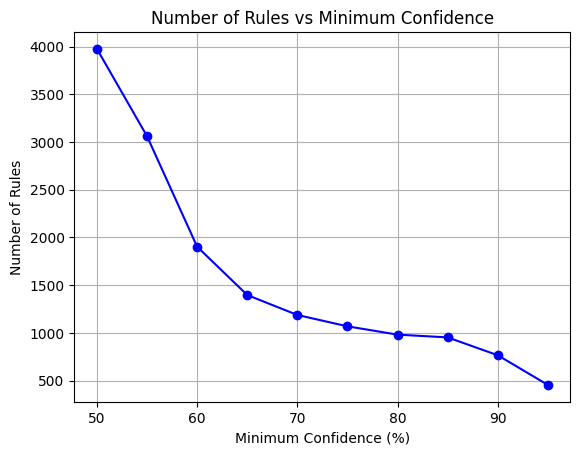

In [409]:
min_conf_values = range(50, 100, 5)  # Confidence minima dal 10% al 90%
num_rules = []

for conf in min_conf_values:
    rules = apriori(X, target="r", supp=20, zmin=2, conf=conf, report="aScl")
    num_rules.append(len(rules))

# Grafico
plt.plot(min_conf_values, num_rules, marker='o', color='blue')
plt.xlabel('Minimum Confidence (%)')
plt.ylabel('Number of Rules')
plt.title('Number of Rules vs Minimum Confidence')
plt.grid()
plt.show()


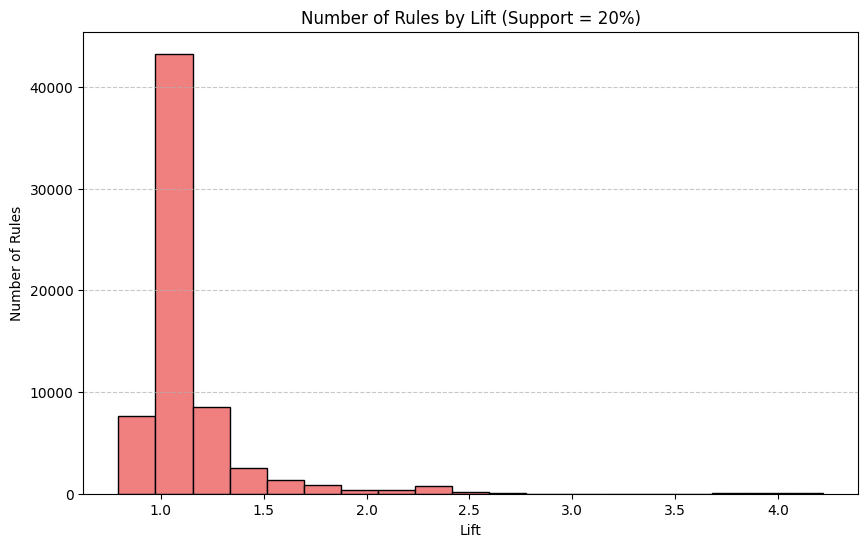

In [410]:
#  Genera le regole per il supporto e il range di confidenza specificato
rules_for_lift = []
for conf in range(min_conf, max_conf):
    rules = apriori(X, target="r", supp=specific_support, zmin=zmin, conf=conf, report="aScl")
    rules_for_lift.extend(rules)  # Aggiungi tutte le regole generate per questo confidenza

# Estrai i valori di lift da tutte le regole generate
lift_values = [rule[5] for rule in rules_for_lift]  # Assumendo che il lift sia nell'indice 5

# Raggruppa i valori di lift in bin per l'istogramma
bins = np.linspace(min(lift_values), max(lift_values), 20)  # Dividi in 20 intervalli
lift_hist, bin_edges = np.histogram(lift_values, bins=bins)

# Crea l'istogramma
plt.figure(figsize=(10, 6))
plt.bar(
    (bin_edges[:-1] + bin_edges[1:]) / 2,  # Usa il centro di ogni bin
    lift_hist,
    width=np.diff(bin_edges),
    color="lightcoral",
    edgecolor="black",
    align="center"
)
plt.xlabel("Lift")
plt.ylabel("Number of Rules")
plt.title(f"Number of Rules by Lift (Support = {specific_support}%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## FP-Growth

In [411]:
from fim import fpgrowth

In [412]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

pd.reset_option('display.max_rows')
itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(1_country, no_adult)",90.386185
1,"(no_episodes, no_adult)",87.987441
2,"(no_episodes, 1_country, no_adult)",81.594976
3,"(no_episodes, 1_country)",84.000000
4,"(1_regions, no_adult)",56.332810
...,...,...
562,"(low_rated, 1_country)",21.670330
563,"(low_rated, no_episodes, no_adult)",21.281005
564,"(low_rated, no_episodes, 1_country)",20.282575
565,"(low_rated, no_episodes)",22.266876


In [413]:
conf = 60
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False) #stampato in questo modo l'elenco è troncato e non scrollabile

pd.set_option('display.max_colwidth', None)

# Convertiamo il DataFrame in HTML e lo rendiamo scrollabile
display(HTML(rules_df.to_html(notebook=True, border=0)
             .replace('<table', '<table style="display:block; height:400px; overflow:auto;"')))


rules_df.shape

,consequent,antecedent,abs_support,%_support,confidence,lift
0,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, 1_country, no_adult)",2214,13.902669,0.654255,4.218225
1,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, 1_country)",2216,13.915228,0.654073,4.217051
2,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes, no_adult)",2285,14.348509,0.651926,4.203206
3,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_episodes)",2287,14.361068,0.651753,4.202089
4,short,"((-0.001, 29.0]_minutes, Comedy/Family, 1_country, no_adult)",2214,13.902669,0.635476,4.097151
5,short,"((-0.001, 29.0]_minutes, Comedy/Family, 1_country)",2216,13.915228,0.635321,4.096149
6,short,"((-0.001, 29.0]_minutes, Comedy/Family, no_adult)",2285,14.348509,0.630519,4.065187
7,short,"((-0.001, 29.0]_minutes, Comedy/Family)",2287,14.361068,0.630375,4.064259
8,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country, no_adult)",2252,14.141287,0.601817,3.880137
9,short,"((-0.001, 29.0]_minutes, no_episodes, 1_country)",2254,14.153846,0.601548,3.878401


(1903, 6)